1.. Find the census trck shape files online (American Fact Finder has them), http://www1.nyc.gov/ has them. The folder you should download is names nycb2010_16d. 
Load it as a geopandas file

In [65]:
import os 
import numpy as np
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import zipfile as zf
from geopandas import GeoDataFrame


from fiona.crs import from_epsg
import shapely
%matplotlib inline

In [2]:
''''
import zipfile as zf
!curl -O http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycb2010_16d.zip
#http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycb2010_16d.zip
zip_ref = zf.ZipFile('nycb2010_16d.zip',
'r')
zip_ref.extractall(os.getenv("PUIdata"))
''''

SyntaxError: EOL while scanning string literal (<ipython-input-2-4275189ccb25>, line 8)

In [3]:
# Download NYC census tract shapefile from nyc.gov into PUIDATA and unzip
os.system('curl -o ' + os.getenv('PUIDATA') + '/nycb2010_16d.zip' +
          ' http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycb2010_16d.zip')
os.system("unzip " + os.getenv("PUIDATA") + "/nycb2010_16d.zip -d " + os.getenv("PUIDATA"))

256

In [7]:
os.getenv("PUIDATA")

'/home/cusp/pf910/PUIdata'

In [8]:
ct_shape = gp.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/nycb2010_16d/nycb2010.shp")
ct_shape.crs = from_epsg(2263)

In [9]:
# a view of the shape file loaded as a geojson file will look like this. Notice the coordinates. They are in 
# epsg=2263 is US feet. You want to convert them in epsg=4326: lat/on . 
# Look at the notebook https://github.com/fedhere/PUI2016_fb55/blob/master/Lab9_SRK325/GeospatialAnalysis_CitiBike.ipynb
ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((964642.2676391602 161835.2651977539,..."
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,"POLYGON ((963363.1168212891 167356.3336181641,..."
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((960069.9965820312 161953.6936035156,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,"POLYGON ((963023.891784668 158246.7521972656, ..."


In [10]:
ct_shape.BoroName.unique()

array([u'Staten Island', u'Manhattan', u'Brooklyn', u'Bronx', u'Queens'], dtype=object)

In [11]:
ct_shape_brooklyn = ct_shape[ct_shape['BoroName'] == 'Brooklyn' ]

In [12]:
ct_shape_brooklyn.shape

(9682, 8)

In [13]:
ct_latlon = ct_shape_brooklyn.to_crs(epsg=4326)

2.. Extract only the Brooklyn shape polygons and convert the coordinates to lat/lon 

In [14]:
ct_latlon.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
5037,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,POLYGON ((-74.00659158337982 40.65561273365177...
5038,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,POLYGON ((-73.99514512602698 40.69877384567195...
5039,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,POLYGON ((-73.99270830309769 40.69809925981344...
5040,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,POLYGON ((-73.98514306089652 40.69488514296981...
5041,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,POLYGON ((-73.98305147125492 40.69837793354038...


In [52]:
ct_latlon.shape

(9682, 8)

In [53]:
ct_latlon.index = range(0, 9682, 1)

In [56]:
ct_latlon_10 = ct_latlon[: :10]

In [57]:
ct_latlon_10.shape

(969, 8)

In [61]:
ct_latlon_10.type

0            Polygon
10           Polygon
20           Polygon
30           Polygon
40           Polygon
50           Polygon
60           Polygon
70           Polygon
80           Polygon
90           Polygon
100          Polygon
110          Polygon
120          Polygon
130          Polygon
140          Polygon
150          Polygon
160          Polygon
170          Polygon
180          Polygon
190          Polygon
200          Polygon
210          Polygon
220          Polygon
230          Polygon
240          Polygon
250          Polygon
260          Polygon
270          Polygon
280          Polygon
290          Polygon
            ...     
9390         Polygon
9400    MultiPolygon
9410         Polygon
9420         Polygon
9430         Polygon
9440         Polygon
9450         Polygon
9460         Polygon
9470         Polygon
9480         Polygon
9490         Polygon
9500         Polygon
9510         Polygon
9520         Polygon
9530         Polygon
9540         Polygon
9550         

3.. Find the coordinates of CUSP: 1 MetroTech Brooklyn. Create a Point shapely geometry with the coordinates of CUSP

    shapely.geometry.Point()

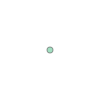

In [15]:
cusp_coor = shapely.geometry.Point( -73.986437, 40.693444)
cusp_coor

4.. Loop over the Brookly polygons (nearly 10000) and assess find in which geometry the polygon is contained

In [92]:
2+2

4

In [51]:
# you will need to use 
# - ct_latlon.geometry (the polygons you are looping over)
# - shapely.geometry.asShape(<the polygon>).contain(<the point>)
# - save the index of the polygon that contains the CUSP
for  ct in (ct_latlon['geometry']):
    if shapely.geometry.asShape(ct).contains(cusp_coor):
         print('CUSP is contained in the polygon that has this index', ct_latlon[ct_latlon.geometry.contains(cusp_coor)].geometry)
       


('CUSP is contained in the polygon that has this index', 35383    POLYGON ((-73.98619262163143 40.693753518938, ...
Name: geometry, dtype: object)


5.. Plot one every 10 polygons of brooklyn (using the geopandas datafame method plot)
and overplot the locati`on of cusp as a point (using pylab.scatter)
Overplot also the census track that contains cusp in red (using the geopandas datafame method plot)

In [66]:
ct_latlon_10 = GeoDataFrame(ct_latlon_10)

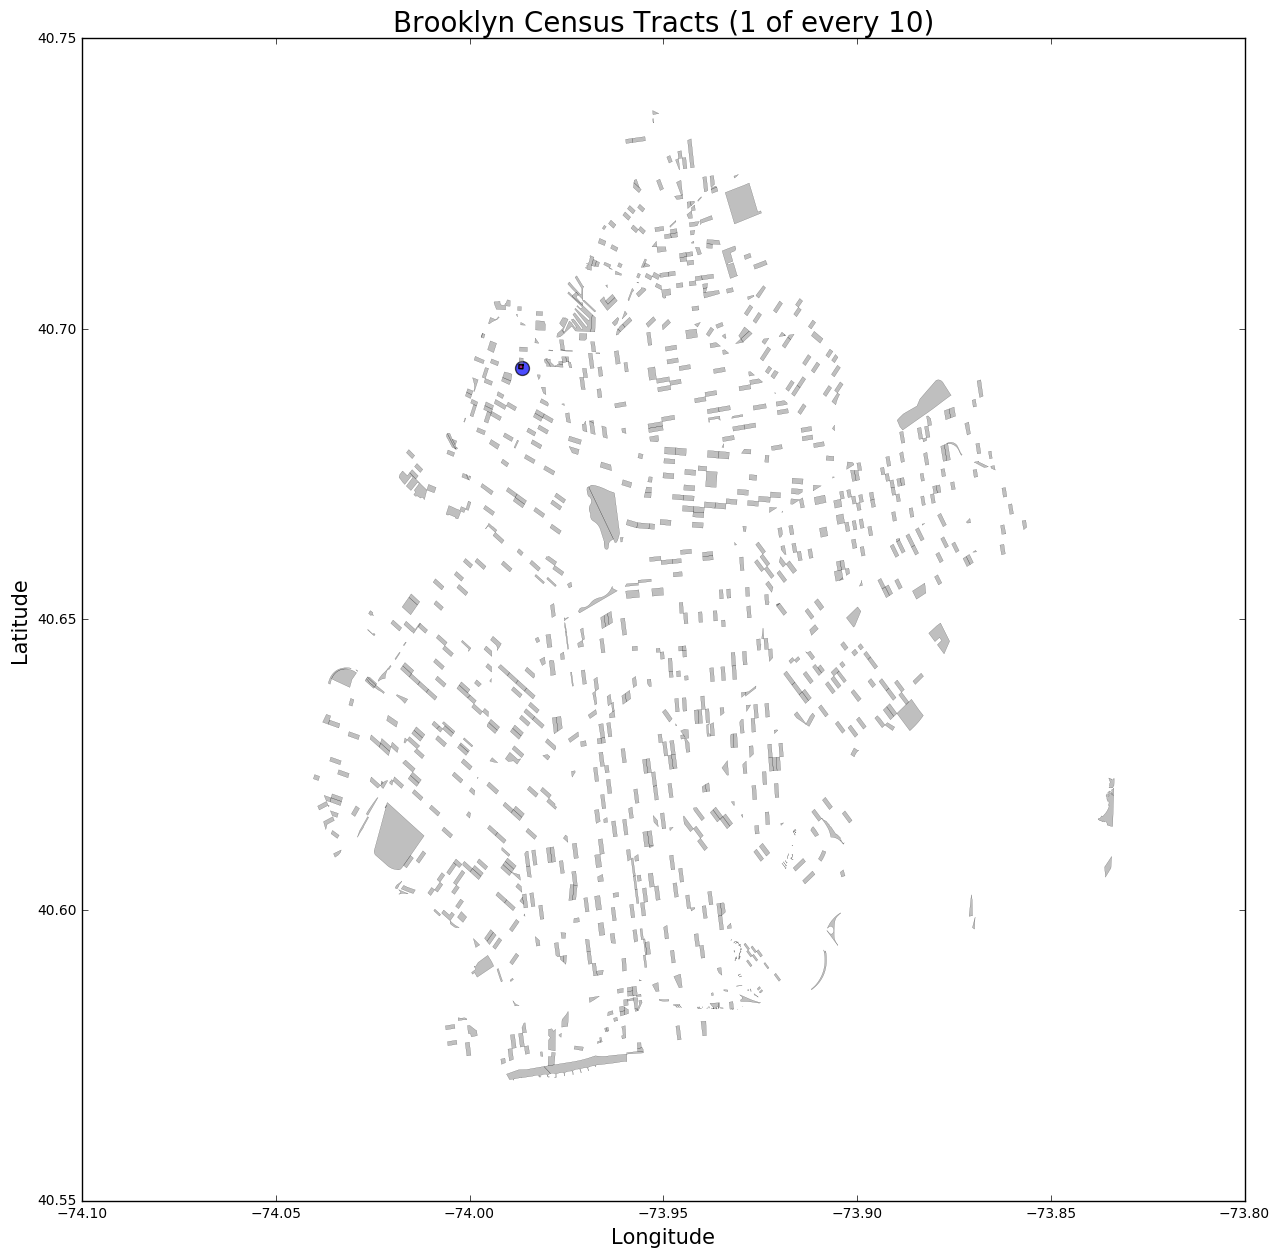

In [91]:

f, ax = plt.subplots(figsize=(15,15))

ax.scatter(-73.986403, 40.693217, s=100, alpha = 0.7)
ct_latlon_10.plot(ax = ax, linewidth=.1, color="grey") 
ct_latlon[ct_latlon.geometry.contains(cusp_coor)].plot(ax = ax , color="red")
plt.title('Brooklyn Census Tracts (1 of every 10)', fontdict={'fontsize':20})
plt.xlabel('Longitude', fontdict={'fontsize':15})
plt.ylabel('Latitude', fontdict={'fontsize':15})
plt.show()